In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv(
    "/home/isaacp/repos/EvMatsim/output/ITERS/it.0/0.countscompare.txt",
    sep="\t",
)
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,1063,32,1,0,8,-1.0,1.0,4.000
1,1063,32,2,0,17,-1.0,1.0,5.831
2,1063,32,3,0,14,-1.0,1.0,5.292
3,1063,32,4,0,26,-1.0,1.0,7.211
4,1063,32,5,0,6,-1.0,1.0,3.464


<BarContainer object of 24 artists>

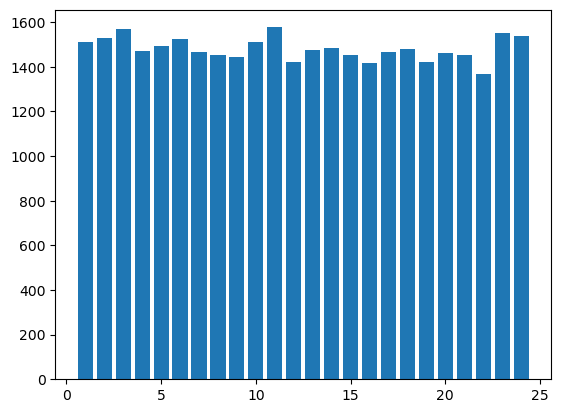

In [12]:
hour_sum = df.groupby("Hour")["Count volumes"].sum()
plt.bar(hour_sum.index, hour_sum.values)

In [5]:
df["Link Id"].unique()

array([1063, 1066, 1070, 1075, 1078, 1079, 1094, 1095, 1098, 1107, 1112,
       1140, 1163, 1171, 1282, 1298, 1300, 1327, 1333, 1342, 1352,  138,
       1517, 1529, 1551, 1575, 1579, 1582, 1607, 1633, 1640, 1644, 1645,
       1651, 1708, 1709, 1711, 1716, 1722, 1727, 1735,  176, 1788, 1890,
       1921, 1925,  197, 2011, 2020, 2021, 2024, 2080, 2117, 2178, 2184,
       2264, 2305, 2353, 2385, 2396,   24, 2413, 2437, 2456, 2480, 2484,
       2486, 2494, 2507,  256,  258,  259,  263, 2682, 2684, 2690, 2728,
       2749, 2766, 2773,   28, 2803, 2867, 2878, 2881, 2894, 2911, 2912,
       2944, 2986, 3018,  305, 3168, 3170, 3181, 3207, 3226,  323, 3238,
        327, 3278, 3292, 3299, 3302, 3328,  346,  347, 3579, 3688, 3697,
       3707, 3717,  391, 3934,  396, 3964, 3965, 3973, 3979,  406,  408,
        411,  413,  417, 4198, 4219, 4246, 4249, 4271, 4297, 4309, 4318,
       4322, 4416,  443,  450,  455, 4590,  461, 4612,  474,  479,  529,
        531,  587,   59,  649,  657,  667,   67,   

In [6]:
link = 1063
dflink = df[df["Link Id"] == link]
dflink.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,1063,32,1,0,8,-1.0,1.0,4.000
1,1063,32,2,0,17,-1.0,1.0,5.831
2,1063,32,3,0,14,-1.0,1.0,5.292
3,1063,32,4,0,26,-1.0,1.0,7.211
4,1063,32,5,0,6,-1.0,1.0,3.464


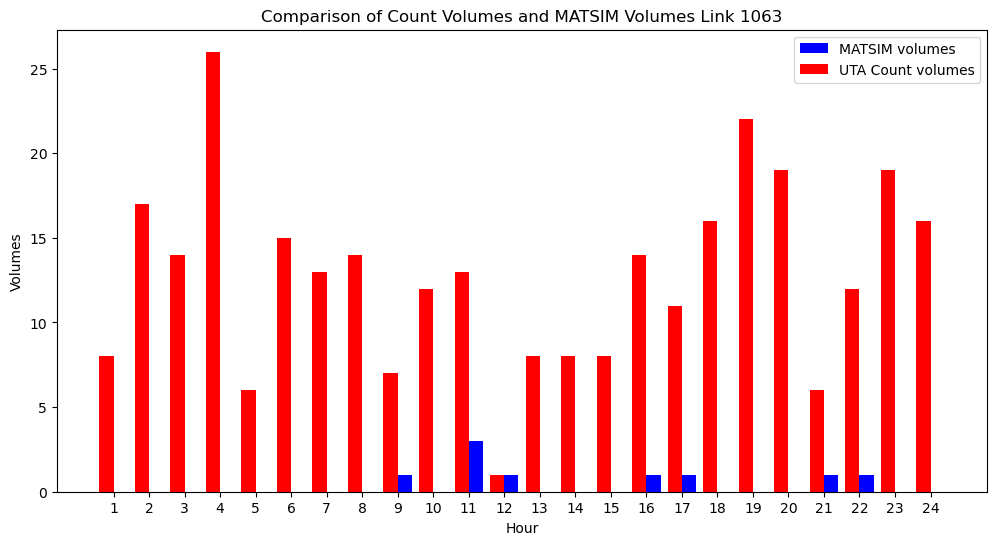

In [7]:
unique_hours = pd.unique(dflink["Hour"])
bar_width = 0.4  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

plt.bar(
    r2, dflink["MATSIM volumes"], color="blue", width=bar_width, label="MATSIM volumes"
)
# Plot Count volumes histogram
plt.bar(
    r1, dflink["Count volumes"], color="red", width=bar_width, label="UTA Count volumes"
)

# Plot MATSIM volumes histogram

# Labels, title, and legend
plt.xlabel("Hour")
plt.ylabel("Volumes")
plt.title(f"Comparison of Count Volumes and MATSIM Volumes Link {link}")
plt.xticks([r + bar_width / 2 for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()